In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [12]:
RHO = 1.7

def Reff_OBC2(psi):
    alpha, beta, gamma = (1.0, 0.8, 4.85)
    rho = RHO  # In Angstroms
    rho_tilde = rho - 0.09  # Offset radius
    return 1/( (1/rho_tilde) - np.tanh(alpha*psi - beta*psi**2 + gamma*psi**3)/rho)

def Reff_Logistic(psi, params):
    nu, b, inflec = params
    rho = RHO  # In Angstroms
    rho_tilde = rho - 0.09  # Offset radius
    A = rho
    K = ((rho_tilde)**(-1) - (rho)**(-1))**(-1)
    return (rho+(K-A)/((1+nu*np.exp(b*(inflec-(psi))))**(1/nu)))

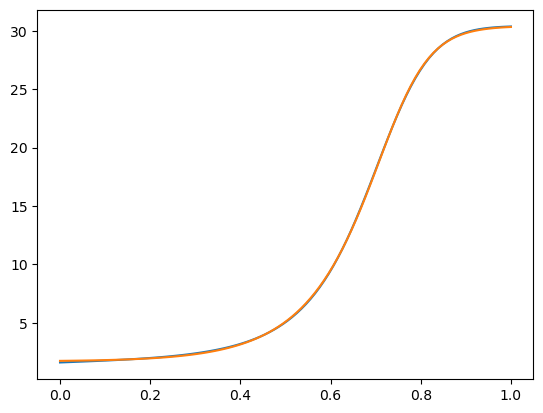

In [13]:
psi_vals = np.linspace(0, 1, 100)
plt.plot(psi_vals, Reff_OBC2(psi_vals))
plt.plot(psi_vals, Reff_Logistic(psi_vals, [ 2.33116082, 19.8358075,   0.70788107]))

In [29]:
def error(params):
    psi_vals = np.linspace(0, 1, 1000)
    return np.sqrt(np.mean(abs(Reff_OBC2(psi_vals)-Reff_Logistic(psi_vals, params))))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.22129156742236847
        x: [ 2.331e+00  1.984e+01  7.079e-01]
      nit: 16
      jac: [-3.003e-03  4.088e-04  1.261e-02]
 hess_inv: [[ 3.994e-01  2.365e+00  8.072e-03]
            [ 2.365e+00  1.503e+01  4.574e-02]
            [ 8.072e-03  4.574e-02  2.124e-04]]
     nfev: 250
     njev: 61
[ 2.33116082 19.8358075   0.70788107]


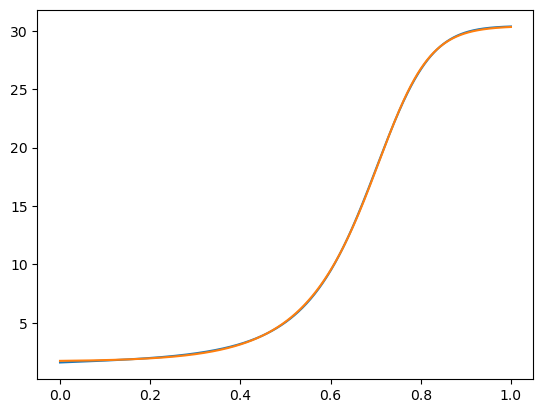

In [31]:
result = minimize(error, (2.33, 16.69, 0.71))
print(result)
psi_vals = np.linspace(0, 1, 1000)
plt.plot(psi_vals, Reff_OBC2(psi_vals))
plt.plot(psi_vals, Reff_Logistic(psi_vals, result.x))
print(result.x)